In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!ls

drive  sample_data


In [5]:
!ls

drive  sample_data


In [6]:
%cd drive/

/content/drive


In [7]:
!ls

'My Drive'


In [8]:
%cd My\ Drive

/content/drive/My Drive


In [9]:
%cd Colab Notebooks/Compvision/

/content/drive/My Drive/Colab Notebooks/Compvision


In [0]:
!python3 object-detection-tutorial-video.py




2019-12-15 20:44:21.929788: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2019-12-15 20:44:21.947027: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-12-15 20:44:21.947591: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla P100-PCIE-16GB major: 6 minor: 0 memoryClockRate(GHz): 1.3285
pciBusID: 0000:00:04.0
2019-12-15 20:44:21.947934: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2019-12-15 20:44:21.949672: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2019-12-15 20:44:21.951337: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library lib

In [0]:
!ls

sample_data


In [0]:
import numpy
import cv2

img = numpy.ones((300,300,1),numpy.uint8)*255
cv2_imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: ignored

In [0]:
!ls

compvis.ipynb  dataset	models


In [0]:
%cd dataset/

/content/drive/My Drive/Colab Notebooks/Compvision/dataset


In [0]:
!ls

fr.mp4	output.mp4  test   train.py	   video.py
model	resize.py   train  Untitled.ipynb


In [0]:
import os,sys,cv2,time

In [0]:


import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPool2D,Dense
from keras.preprocessing import image
import tensorflow as tf
from keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image



Using TensorFlow backend.


In [0]:
image_gen=ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            rescale=1/255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

In [0]:


image_gen.flow_from_directory('train/')



Found 354 images belonging to 3 classes.


In [0]:


model=Sequential()



In [0]:
input_shape=(150,150,1)

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('softmax'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 32)        9248      
_____________________________________

In [0]:
batch_size=32
train_image_gen=image_gen.flow_from_directory('train/',
                                             target_size=input_shape[:2],
                                             batch_size=batch_size,
                                             class_mode='binary')
test_image_gen=image_gen.flow_from_directory('test/',
                                             target_size=input_shape[:2],
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 354 images belonging to 3 classes.
Found 313 images belonging to 3 classes.


In [0]:
train_image_gen.class_indices #test class

{'fire': 0, 'neutral': 1, 'smoke': 2}

In [0]:
result=model.fit_generator(train_image_gen,epochs=10,
                            steps_per_epoch=1000,
                           validation_data=test_image_gen,validation_steps=6)

Epoch 1/10
1000/1000 [==============================] - 229s 229ms/step - loss: 1.7317 - acc: 0.1411 - val_loss: 3.8917 - val_acc: 0.1823
Epoch 2/10
1000/1000 [==============================] - 220s 220ms/step - loss: 1.8643 - acc: 0.1415 - val_loss: 3.8917 - val_acc: 0.1823
Epoch 3/10
1000/1000 [==============================] - 220s 220ms/step - loss: 1.6771 - acc: 0.1411 - val_loss: 3.8917 - val_acc: 0.1823
Epoch 4/10
1000/1000 [==============================] - 220s 220ms/step - loss: 1.7666 - acc: 0.1412 - val_loss: 3.8917 - val_acc: 0.1823
Epoch 5/10
1000/1000 [==============================] - 219s 219ms/step - loss: 1.7647 - acc: 0.1412 - val_loss: 3.8917 - val_acc: 0.1823
Epoch 6/10
1000/1000 [==============================] - 220s 220ms/step - loss: 1.5981 - acc: 0.1413 - val_loss: 3.8917 - val_acc: 0.1823
Epoch 7/10
1000/1000 [==============================] - 219s 219ms/step - loss: 1.6532 - acc: 0.1412 - val_loss: 3.8917 - val_acc: 0.1823
Epoch 8/10
1000/1000 [============

In [0]:
model.save_weights("model/firesmoke_weights.h5") #save model weight
model.save("model/firesmoke.h5") #save model
print("Model Saved")

Model Saved


In [0]:
import cv2
import tensorflow as tf
import numpy as np


In [0]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# ilkleme
classifier = Sequential()

# Adım 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Adım 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# 2. convolution katmanı
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adım 3 - Flattening
classifier.add(Flatten())

# Adım 4 - YSA
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

# CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# CNN ve resimler

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (64, 64),
                                                 batch_size = 1,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (64, 64),
                                            batch_size = 1,
                                            class_mode = 'binary')

classifier.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 30,
                         validation_data = test_set,
                         nb_val_samples = 3)








/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`


Found 975 images belonging to 3 classes.
Found 313 images belonging to 3 classes.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=8000, epochs=30, validation_steps=3)`


Epoch 1/30
 832/8000 [==>...........................] - ETA: 51:37 - loss: -0.5312 - acc: 0.5312

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


8000/8000 [==============================] - 589s 74ms/step - loss: -1.9577 - acc: 0.6178 - val_loss: -3.3277 - val_acc: 0.3333
Epoch 2/30
8000/8000 [==============================] - 195s 24ms/step - loss: -2.3745 - acc: 0.6455 - val_loss: -4.9098 - val_acc: 0.3333
Epoch 3/30
8000/8000 [==============================] - 194s 24ms/step - loss: -2.5442 - acc: 0.6395 - val_loss: 0.0112 - val_acc: 1.0000
Epoch 4/30
8000/8000 [==============================] - 188s 24ms/step - loss: -2.6368 - acc: 0.6400 - val_loss: -5.3141 - val_acc: 0.6667
Epoch 5/30
8000/8000 [==============================] - 188s 24ms/step - loss: -2.8971 - acc: 0.6619 - val_loss: 0.0862 - val_acc: 1.0000
Epoch 6/30
8000/8000 [==============================] - 188s 23ms/step - loss: -2.9965 - acc: 0.6758 - val_loss: 4.1570 - val_acc: 0.6667
Epoch 7/30
8000/8000 [==============================] - 190s 24ms/step - loss: -3.0773 - acc: 0.6827 - val_loss: -3.2850 - val_acc: 0.3333
Epoch 8/30
8000/8000 [===================

In [0]:
classifier.save_weights("model/firesmoke_weights.h5") #save model weight
classifier.save("model/firesmoke.h5") #save model
print("Model Saved")

Model Saved


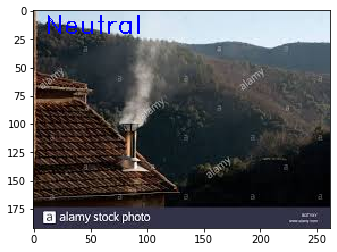

In [0]:


img=cv2.imread('test/smoke/image_11.jpg',1)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
_file="test/smoke/image_11.jpg"
images=image.load_img(_file,target_size=(64,64))
images=image.img_to_array(images)
images=np.expand_dims(images,axis=0)
images=images/255
test_model=load_model('model/firesmoke.h5')
prediction=test_model.predict_classes(images)
if prediction==0:
    img =cv2.putText(img=np.copy(img), text="fire", org=(10,10),fontFace=2, fontScale=0.75, color=(0,0,255), thickness=1)
elif prediction==1:
    img =cv2.putText(img=np.copy(img), text="Neutral", org=(10,20),fontFace=2, fontScale=0.75, color=(0,0,255), thickness=1)
elif prediction==2:
    img =cv2.putText(img=np.copy(img), text="smoke", org=(10,30),fontFace=2, fontScale=0.75, color=(0,0,255), thickness=1)
else:
    print('Nothing')
plt.imshow(img)
plt.show()



In [0]:
!python video.py

Using TensorFlow backend.






2019-12-20 17:07:02.096652: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-12-20 17:07:02.096834: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x6d0b180 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2019-12-20 17:07:02.096862: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2019-12-20 17:07:02.098691: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2019-12-20 17:07:02.185777: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-12-20 17:07:02.186368: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x6d0c140 initialized for platform CUDA (this does not guarantee that XLA will be use

In [0]:
%cd maskrcnn

/content/drive/My Drive/Colab Notebooks/Compvision/maskrcnn


In [0]:
!python visualize_cv2.py

Using TensorFlow backend.
... done downloading pretrained model!

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_

In [10]:
!ls

compvis.ipynb  fire  maskrcnn  mask_rcnn_coco.h5  model  models


In [0]:
%cd ..


/content/drive/My Drive/Colab Notebooks/Compvision


In [0]:
!ls

compvis.ipynb  dataset	maskrcnn  models


In [0]:
!ls

compvis.ipynb  maskrcnn  mask_rcnn_coco.h5  model  models


In [0]:
%cd model

/content/drive/My Drive/Colab Notebooks/Compvision/model


In [0]:
!ls

AUTHORS     CONTRIBUTING.md    LICENSE	 README.md  WORKSPACE
CODEOWNERS  ISSUE_TEMPLATE.md  official  research


In [0]:
%cd research/

/content/drive/My Drive/Colab Notebooks/Compvision/model/research


In [0]:
%cd object_detection


/content/drive/My Drive/Colab Notebooks/Compvision/model/research/object_detection


In [0]:
%cd ..

/content/drive/My Drive/Colab Notebooks/Compvision/model/research


In [0]:
!python3 train.py --logtostderr --train_dir=training/ --pipeline_config_path=training/faster_rcnn_inception_v2_pets.config

In [0]:
%set PYTHONPATH=/root/model/research:/root/model/research/slim

UsageError: Line magic function `%set` not found.


In [0]:
%export PATH="$PATH:

In [0]:
!protoc object_detection/protos/*.proto --python_out=.

object_detection/protos/*.proto: No such file or directory


In [0]:
!ls

anchor_generators			  model_hparams.py
box_coders				  model_lib.py
builders				  model_lib_test.py
CONTRIBUTING.md				  model_lib_v2.py
core					  model_lib_v2_test.py
data					  model_main.py
data_decoders				  models
dataset_tools				  model_tpu_main.py
dockerfiles				  Object_detection_image.py
eval_util.py				  object_detection_tutorial.ipynb
eval_util_test.py			  Object_detection_video.py
exporter.py				  Object_detection_webcam.py
exporter_test.py			  predictors
export_inference_graph.py		  protos
export_tflite_ssd_graph_lib.py		  __pycache__
export_tflite_ssd_graph_lib_test.py	  README.md
export_tflite_ssd_graph.py		  resizer.py
faster_rcnn_inception_v2_coco_2018_01_28  samples
g3doc					  ssd_mobilenet_v1_coco_2018_01_28
generate_tfrecord.py			  test_ckpt
images					  test_data
inference				  test_images
inference_graph				  test.JPG
__init__.py				  test.record
inputs.py				  tpu_exporters
inputs_test.py				  training
legacy					  train.py
matchers				  train.record
meta_arch

In [0]:
%cd ..

/content/drive/My Drive/Colab Notebooks/Compvision/model/research


In [0]:
!protoc object_detection/protos/*.proto --python_out=.

In [0]:
%set_env PYTHONPATH=/content/models/research:/content/models/research/slim

env: PYTHONPATH=/content/models/research:/content/models/research/slim


In [0]:
!python object_detection/builders/model_builder_test.py

Traceback (most recent call last):
  File "object_detection/builders/model_builder_test.py", line 23, in <module>
    from object_detection.builders import model_builder
ModuleNotFoundError: No module named 'object_detection'


In [0]:
%cd object_detection/

/content/drive/My Drive/Colab Notebooks/Compvision/model/research/object_detection


In [0]:
!python object_detection/builders/model_builder_test.py

python3: can't open file 'object_detection/builders/model_builder_test.py': [Errno 2] No such file or directory


In [8]:
!ls

compvis.ipynb  fire  maskrcnn  mask_rcnn_coco.h5  model  models


In [11]:
%cd fire

/content/drive/My Drive/Colab Notebooks/Compvision/fire


In [12]:
!ls

data  model  objdetect-webcam.py  resize.py  test.ipynb  train.py  video.py


In [14]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# ilkleme
classifier = Sequential()

# Adım 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (150, 150, 3), activation = 'relu'))

# Adım 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# 2. convolution katmanı
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adım 3 - Flattening
classifier.add(Flatten())

# Adım 4 - YSA
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

# CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# CNN ve resimler

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('data/train/',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('data/test/',
                                            target_size = (150, 150),
                                            batch_size =32,
                                            class_mode = 'binary')

classifier.fit_generator(training_set,
                         samples_per_epoch = 2000,
                         nb_epoch = 20,
                         validation_data = test_set,
                         nb_val_samples = 2000)


model.save_weights("model/firesmoke_weights.h5") #save model weight
model.save("model/firesmoke_model.h5") #save model
print("Model Saved")


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(150, 150,..., activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`


Found 435 images belonging to 2 classes.
Found 101 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=62, epochs=20, validation_steps=2000)`


Epoch 1/20





62/62 [==============================] - 1050s 17s/step - loss: 0.2422 - acc: 0.9005 - val_loss: 0.4429 - val_acc: 0.7823
Epoch 2/20
62/62 [==============================] - 818s 13s/step - loss: 0.0999 - acc: 0.9607 - val_loss: 0.1013 - val_acc: 0.9765
Epoch 3/20
62/62 [==============================] - 819s 13s/step - loss: 0.1076 - acc: 0.9596 - val_loss: 0.3471 - val_acc: 0.8899
Epoch 4/20
62/62 [==============================] - 798s 13s/step - loss: 0.0555 - acc: 0.9837 - val_loss: 0.0401 - val_acc: 0.9942
Epoch 5/20
62/62 [==============================] - 802s 13s/step - loss: 0.0326 - acc: 0.9921 - val_loss: 0.0893 - val_acc: 0.9805
Epoch 6/20
62/62 [==============================] - 795s 13s/step - loss: 0.0229 - acc: 0.9956 - val_loss: 0.0435 - val_acc: 0.9934
Epoch 7/20
62/62 [==============================] - 799s 13s/step - loss: 0.0174 - acc: 0.9966 - val_loss: 0.0123 - val_acc: 1.0000
Epoch 8/20
62/62 [==============================] - 800s 13s/step - lo

NameError: ignored

In [15]:
classifier.save_weights("model/firesmoke_weights.h5") #save model weight
classifier.save("model/firesmoke_model.h5") #save model
print("Model Saved")

Model Saved


In [21]:
import os
 
import numpy as np
 
import matplotlib.pyplot as plt
 
import tensorflow as tf
 
from keras.models import load_model
from keras.preprocessing import image
	
loaded_model = tf.keras.models.load_model('model/firesmoke_model.h5')
loaded_model.layers[0].input_shape #(None, 150, 150, 3)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


(None, 150, 150, 3)

In [47]:
new_model=load_model('model/firesmoke_model.h5')
fire='data/test/fire/image_0.jpg'
smoke='data/test/smoke/122.jpg'
fire=image.load_img(fire,target_size=(150,150))
smoke=image.load_img(smoke,target_size=(150,150))
fire=image.img_to_array(fire)
fire=image.img_to_array(fire)
#-------------------------------------------
fire=np.expand_dims(fire,axis=0)
smoke=np.expand_dims(smoke,axis=0)
fire=fire/255
smoke=smoke/255
print(fire.shape)
print(smoke.shape)

a=classifier.predict_classes(fire)
b=classifier.predict_classes(smoke)

(1, 150, 150, 3)
(1, 150, 150, 3)


In [48]:
print(a)

[[0]]


In [49]:
print(b)

[[1]]


In [51]:
a=classifier.predict_classes(fire)
b=classifier.predict_classes(smoke)
if a==0:
    print('Fire Detect')
else:
    print('Smoke Detect')

Fire Detect


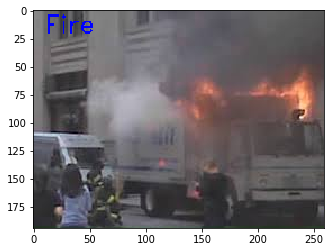

In [56]:
import cv2
img=cv2.imread('data/test/fire/image_0.jpg',1)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
_file="data/test/fire/image_0.jpg"
images=image.load_img(_file,target_size=(150,150))
images=image.img_to_array(images)
images=np.expand_dims(images,axis=0)
images=images/255
test_model=load_model('model/firesmoke_model.h5')
prediction=test_model.predict_classes(images)
if prediction==0:
    img =cv2.putText(img=np.copy(img), text="Fire", org=(10,20),fontFace=2, fontScale=0.75, color=(0,0,255), thickness=1)
elif prediction==1:
    img =cv2.putText(img=np.copy(img), text="Smoke", org=(10,30),fontFace=2, fontScale=0.75, color=(0,0,255), thickness=1)

plt.imshow(img)
plt.show()

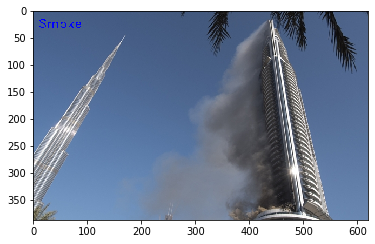

In [57]:
import cv2
img=cv2.imread('data/test/smoke/122.jpg',1)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
_file="data/test/smoke/122.jpg"
images=image.load_img(_file,target_size=(150,150))
images=image.img_to_array(images)
images=np.expand_dims(images,axis=0)
images=images/255
test_model=load_model('model/firesmoke_model.h5')
prediction=test_model.predict_classes(images)
if prediction==0:
    img =cv2.putText(img=np.copy(img), text="Fire", org=(10,20),fontFace=2, fontScale=0.75, color=(0,0,255), thickness=1)
elif prediction==1:
    img =cv2.putText(img=np.copy(img), text="Smoke", org=(10,30),fontFace=2, fontScale=0.75, color=(0,0,255), thickness=1)

plt.imshow(img)
plt.show()